# Exploratory Data Analysis - EDA

In [3]:
## CALLING LIBRARIES USED FOR EDA

library("tidyverse")
library("ggplot2")

In [4]:
## STORING DATA IN THE CSV FILE TO VARIABLE "data"
data = read.csv('C:/Users/T0SHIBA/DataScienceInR/data/Mulitple LR_Cars.csv')

In [5]:
## VIEWING THE FIRST 6 ROWS USING HEAD() FUNCTION
head(data)

Price,Brand,Body,Mileage,EngineV,Engine.Type,Registration,Year
4200,BMW,sedan,277,2.0,Petrol,yes,1991
7900,Mercedes-Benz,van,427,2.9,Diesel,yes,1999
13300,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003
23000,Audi,crossover,240,4.2,Petrol,yes,2007
18300,Toyota,crossover,120,2.0,Petrol,yes,2011
199999,Mercedes-Benz,crossover,0,5.5,Petrol,yes,2016


## 1. VARIABLE IDENTIFICATION

##### CONTINUOUS OR CATAGORICAL

###### Continuous Variables : Price , Mileage , EngineV , Year

###### Catagorical Variables : Brand , Body , Engine.Type , Registration

## 2. TREATMENT OF MISSING VALUES

In [6]:
## TAKING COUNT OF MISSING VALUES IN THE DATASET
colSums(is.na(data))

Price        Brand         Body      Mileage      EngineV  Engine.Type 
         172            0            0            0          150            0 
Registration         Year 
           0            0

### Here, missing values are in columns : Price & EngineV

In [7]:
## CHECKING NUMBER OF COLUMNS AND ROWS
dim(data)

[1] 4345    8

##### Here the number of null value rows are very less considered to the total data, hence the null values are deleted

In [8]:
## DELETING NULL VALUE ROWS
data = na.omit(data)

In [9]:
colSums(is.na(data))

Price        Brand         Body      Mileage      EngineV  Engine.Type 
           0            0            0            0            0            0 
Registration         Year 
           0            0

In [10]:
## NUMBER OF ROWS AND COLUMNS AFTER DELETING NULL VALUES
dim(data)

[1] 4025    8

## 3. TREATMENT OF OUTLIERS

##### OUTLIERS NEED TO BE CHECKED AND TREATED FOR CONTINOUS VARIABLES

### I. PRICE

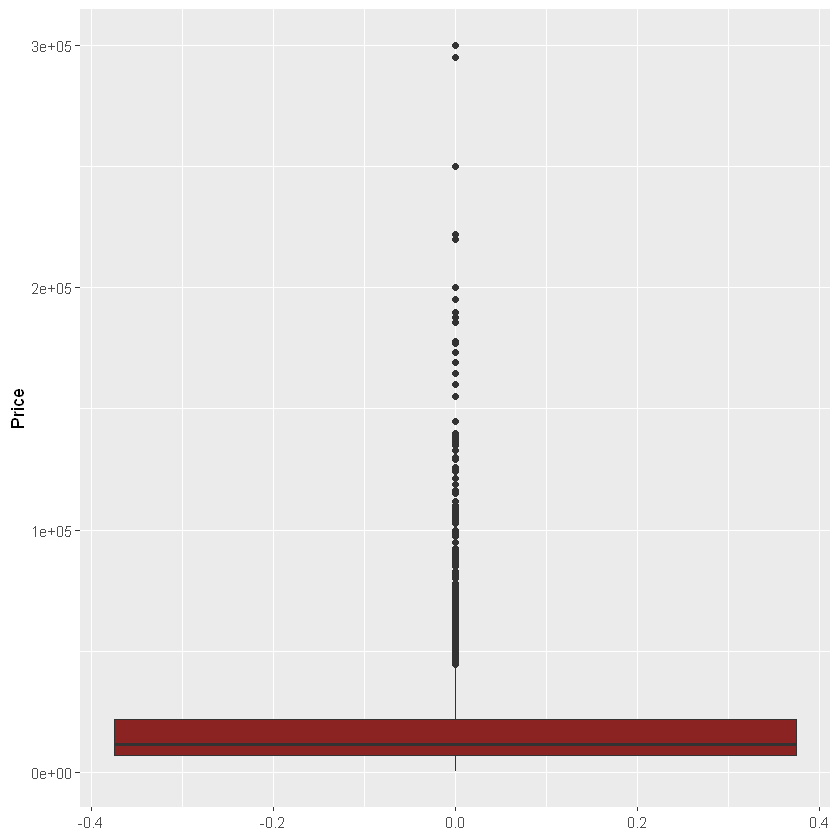

In [11]:
## CHECKING FOR OUTLIERS WITH BOXPLOT
ggplot(data=data,aes(y=Price))+ geom_boxplot(fill="brown4")

In [12]:
## FINDING INTER QUARTILE RANGE TO CALCULATE MAXIMUM VALUE OF DISTRIBUTION USING "IQR" FUNCTION
iqr_price = IQR(data$Price)

In [13]:
iqr_price

[1] 14901

In [14]:
## QUANTILE FUNTION WILL GIVE US THE IMPORTANT QUARTILES
quantile(data$Price)

0%    25%    50%    75%   100% 
   600   6999  11500  21900 300000

In [15]:
## WITH "PROBS" ATTIBUTE WE CAN SPECIFY THE PARTICULAR QUANTILE NEEDED (IT SHOULD BE BETWEEN 0 AND 1)
quantile(data$Price,probs=0.75)

75% 
21900

In [16]:
## MAX VALUE OF PRICE IS CALCULATED USING FORMULA "Q3 + (1.5*IQR)"
max_price = quantile(data$Price,probs=0.75)+ (1.5*iqr_price)

In [17]:
max_price

75% 
44251.5

In [18]:
## FILTERING DATA WHERE PRICE ABOVE THE MAXIMUM PRICE
filter(data,Price>max_price)

Price,Brand,Body,Mileage,EngineV,Engine.Type,Registration,Year
199999.00,Mercedes-Benz,crossover,0,5.50,Petrol,yes,2016
67500.00,BMW,crossover,1,2.50,Diesel,yes,2016
63000.00,Mercedes-Benz,crossover,86,5.50,Petrol,yes,2009
133000.00,BMW,crossover,7,4.40,Petrol,yes,2015
50000.00,Mercedes-Benz,sedan,240,3.50,Petrol,yes,2006
69999.00,Audi,crossover,21,3.00,Petrol,yes,2015
107999.00,Mercedes-Benz,crossover,0,2.98,Diesel,yes,2016
45500.00,BMW,crossover,76,4.40,Petrol,yes,2010
47000.00,BMW,other,5,2.00,Petrol,yes,2014
46800.00,BMW,sedan,33,2.00,Diesel,yes,2014


In [19]:
## ASSGINING VALUES TO FIND QUANTILES
quantile_range = seq(0.75,0.99,by=0.01)

In [20]:
quantile_range

[1] 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89
[16] 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99

In [21]:
## USING QUANTILE FUNCTION CALLING QUANTILES FROM 75TH TO 99TH 
quantile(data$Price,probs=quantile_range)

75%       76%       77%       78%       79%       80%       81%       82% 
 21900.00  22500.00  23200.00  23999.00  24798.00  25500.00  26999.44  28500.00 
      83%       84%       85%       86%       87%       88%       89%       90% 
 29000.00  30500.00  32000.00  33709.92  35280.59  37000.00  39000.00  40996.00 
      91%       92%       93%       94%       95%       96%       97%       98% 
 43983.16  47316.00  51500.00  56500.00  64820.00  70000.00  81639.72 103999.00 
      99% 
129812.52

##### Here we already know the max price value 44251.5. So the outliers will be filled with quantile of value less than max value. 
Quantile 90 = 40996 is used to fill outliers 

In [22]:
## USING FOR LOOPS CHANGING VALUES
for (i in 1:4025)
{
    if (data$Price[i]>max_price){
        data$Price[i]=quantile(data$Price,probs=0.90)}
}

In [23]:
filter(data,Price>max_price)

Price,Brand,Body,Mileage,EngineV,Engine.Type,Registration,Year


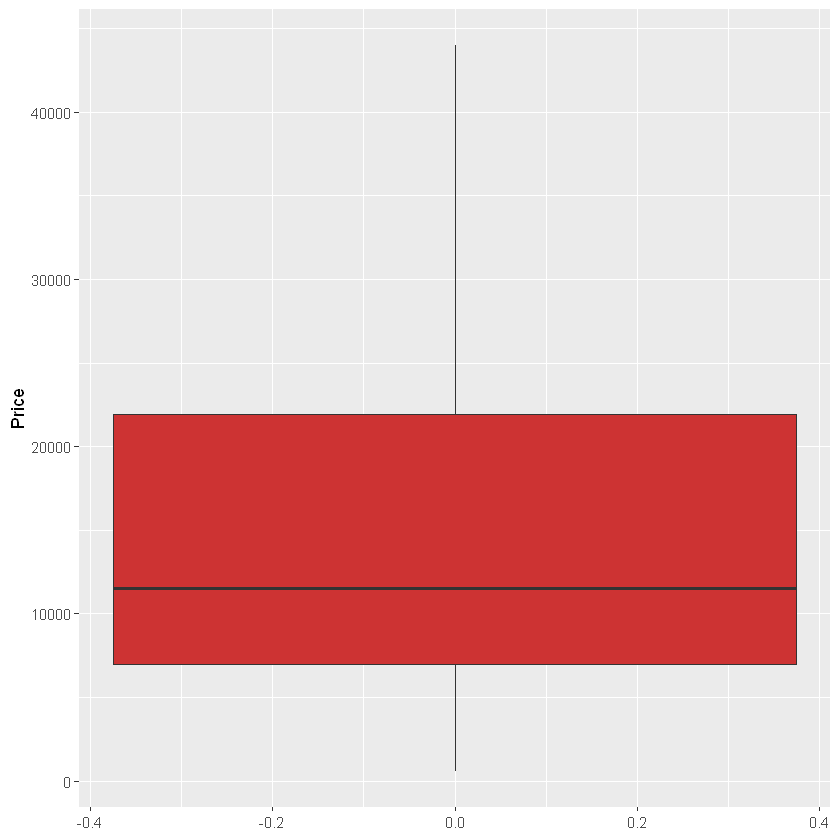

In [24]:
## BOXPLOT FOR PRICE TO CHECK FOR OUTLIERS
ggplot(data=data,aes(y=Price))+ geom_boxplot(fill='brown3')

### II. MILEAGE

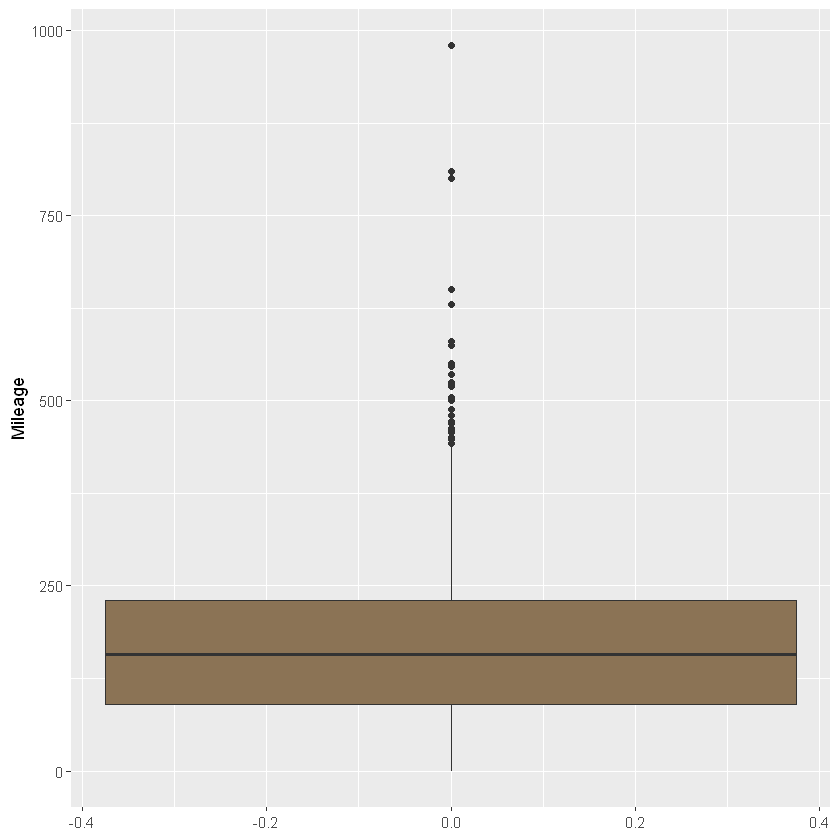

In [25]:
## CHECKING FOR OUTLIERS WITH BOXPLOT
ggplot(data=data,aes(y=Mileage))+ geom_boxplot(fill='burlywood4')

In [26]:
## FINDING INTER QUARTILE RANGE TO CALCULATE MAXIMUM VALUE OF DISTRIBUTION USING "IQR" FUNCTION
iqr_mileage= IQR(data$Mileage)

In [27]:
iqr_mileage

[1] 140

In [28]:
## WITH "PROBS" ATTIBUTE WE CAN SPECIFY THE PARTICULAR QUANTILE NEEDED (IT SHOULD BE BETWEEN 0 AND 1)
quantile(data$Mileage,probs=0.75)

75% 
230

In [29]:
## MAX VALUE OF Mileage IS CALCULATED USING FORMULA "Q3 + (1.5*IQR)"
max_mileage = quantile(data$Mileage,probs=0.75)+ (1.5*iqr_mileage)

In [30]:
max_mileage

75% 
440

In [31]:
## FILTERING DATA WHERE MILEAGE ABOVE THE MAXIMUM MILEAGE
filter(data,Mileage>max_mileage)

Price,Brand,Body,Mileage,EngineV,Engine.Type,Registration,Year
2500,Volkswagen,sedan,488,2.0,Petrol,yes,1991
4900,Renault,van,472,2.5,Diesel,yes,2000
2650,Mercedes-Benz,sedan,470,2.0,Gas,yes,1985
6500,Volkswagen,other,547,1.9,Diesel,yes,1998
5200,Volkswagen,van,442,2.4,Diesel,yes,1992
8700,Volkswagen,other,520,2.5,Diesel,yes,1999
2700,Toyota,sedan,550,1.6,Gas,yes,1989
4900,Volkswagen,sedan,500,1.9,Diesel,yes,1995
8500,Mercedes-Benz,van,630,2.9,Diesel,yes,1998
3800,Mercedes-Benz,van,462,2.2,Diesel,no,2001


In [32]:
## USING QUANTILE FUNCTION CALLING QUANTILES FROM 75TH TO 99TH 
quantile(data$Mileage,probs=quantile_range)

75%    76%    77%    78%    79%    80%    81%    82%    83%    84%    85% 
230.00 233.00 238.00 240.00 245.00 250.00 250.00 254.00 260.00 263.00 270.00 
   86%    87%    88%    89%    90%    91%    92%    93%    94%    95%    96% 
272.64 280.00 281.12 288.00 297.00 300.00 303.00 315.00 326.00 340.80 358.08 
   97%    98%    99% 
375.56 400.00 434.52

In [33]:
## USING FOR LOOPS CHANGING VALUES
for (i in 1:4025)
{
    if (data$Mileage[i]>max_mileage)
    {
        data$Mileage[i]=quantile(data$Mileage,probs=0.98)
    }
}

In [34]:
filter(data,Mileage>max_mileage)

Price,Brand,Body,Mileage,EngineV,Engine.Type,Registration,Year


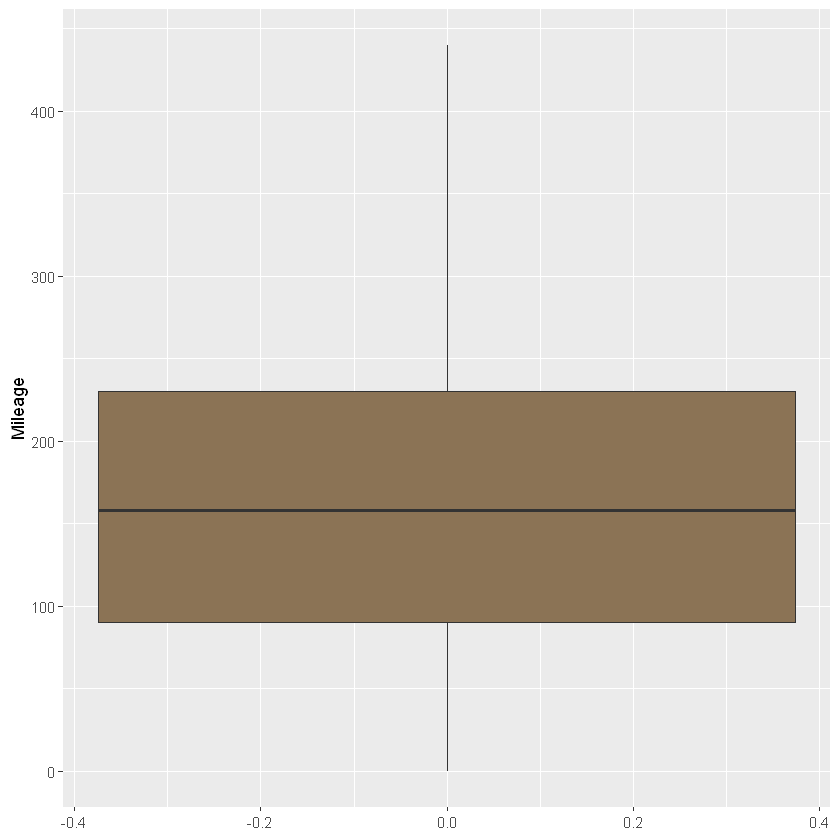

In [35]:
## CHECKING FOR OUTLIERS WITH BOXPLOT
ggplot(data=data,aes(y=Mileage))+ geom_boxplot(fill='burlywood4')

### III. EngineV

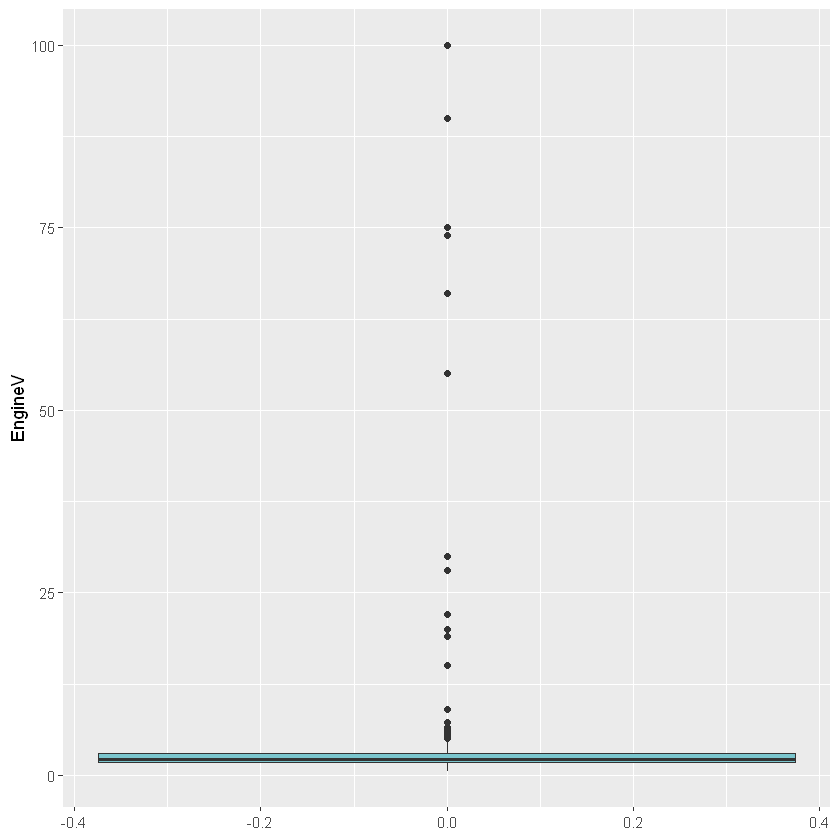

In [36]:
## CHECKING FOR OUTLIERS WITH BOXPLOT
ggplot(data=data,aes(y=EngineV))+ geom_boxplot(fill='cadetblue3')

In [37]:
## FINDING INTER QUARTILE RANGE TO CALCULATE MAXIMUM VALUE OF DISTRIBUTION USING "IQR" FUNCTION
iqr_enginev= IQR(data$EngineV)

In [38]:
## MAX VALUE OF ENGINEV IS CALCULATED USING FORMULA "Q3 + (1.5*IQR)"
max_enginev = quantile(data$EngineV,probs=0.75)+ (1.5*iqr_enginev)

In [39]:
max_enginev

75% 
4.8

In [40]:
## FILTERING DATA WHERE ENGINEV ABOVE THE MAXIMUM ENGINEV
filter(data,EngineV>max_enginev)

Price,Brand,Body,Mileage,EngineV,Engine.Type,Registration,Year
13300.00,Mercedes-Benz,sedan,358,5.00,Gas,yes,2003
40996.00,Mercedes-Benz,crossover,0,5.50,Petrol,yes,2016
40992.16,Mercedes-Benz,crossover,86,5.50,Petrol,yes,2009
29500.00,Mercedes-Benz,sedan,134,5.00,Petrol,yes,2008
13500.00,Mercedes-Benz,sedan,317,5.00,Petrol,yes,2001
27000.00,BMW,sedan,137,5.00,Other,yes,2005
28000.00,BMW,other,100,5.00,Petrol,yes,2005
23900.00,Mercedes-Benz,sedan,187,5.50,Petrol,yes,2007
25000.00,Mercedes-Benz,sedan,130,5.50,Petrol,yes,2007
5500.00,Mercedes-Benz,sedan,100,99.99,Petrol,yes,2007


In [41]:
## USING QUANTILE FUNCTION CALLING QUANTILES FROM 75TH TO 99TH 
quantile(data$EngineV,probs=quantile_range)

75%   76%   77%   78%   79%   80%   81%   82%   83%   84%   85%   86%   87% 
3.000 3.000 3.000 3.000 3.000 3.000 3.000 3.000 3.000 3.032 3.200 3.200 3.500 
  88%   89%   90%   91%   92%   93%   94%   95%   96%   97%   98%   99% 
3.500 3.800 4.000 4.200 4.300 4.400 4.500 4.700 5.000 5.200 5.500 6.152

In [42]:
## USING FOR LOOPS CHANGING VALUES
for (i in 1:4025)
{
    if (data$EngineV[i]>max_enginev)
    {
        data$EngineV[i]=quantile(data$EngineV,probs=0.95)
    }
}

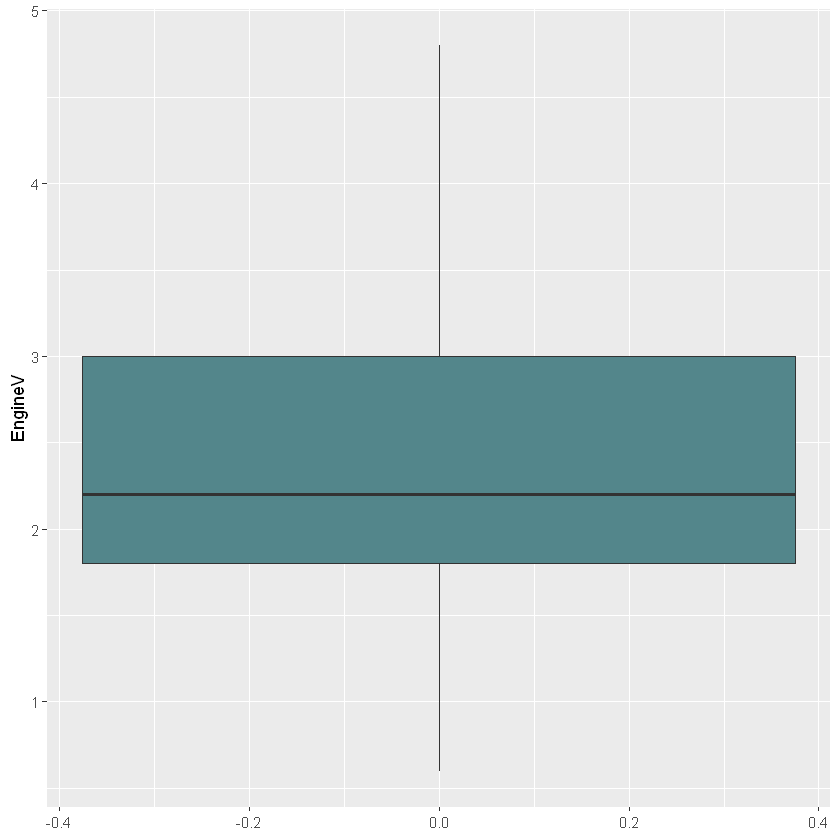

In [43]:
## CHECKING FOR OUTLIERS WITH BOXPLOT
ggplot(data=data,aes(y=EngineV))+ geom_boxplot(fill='cadetblue4')

### IV.YEAR

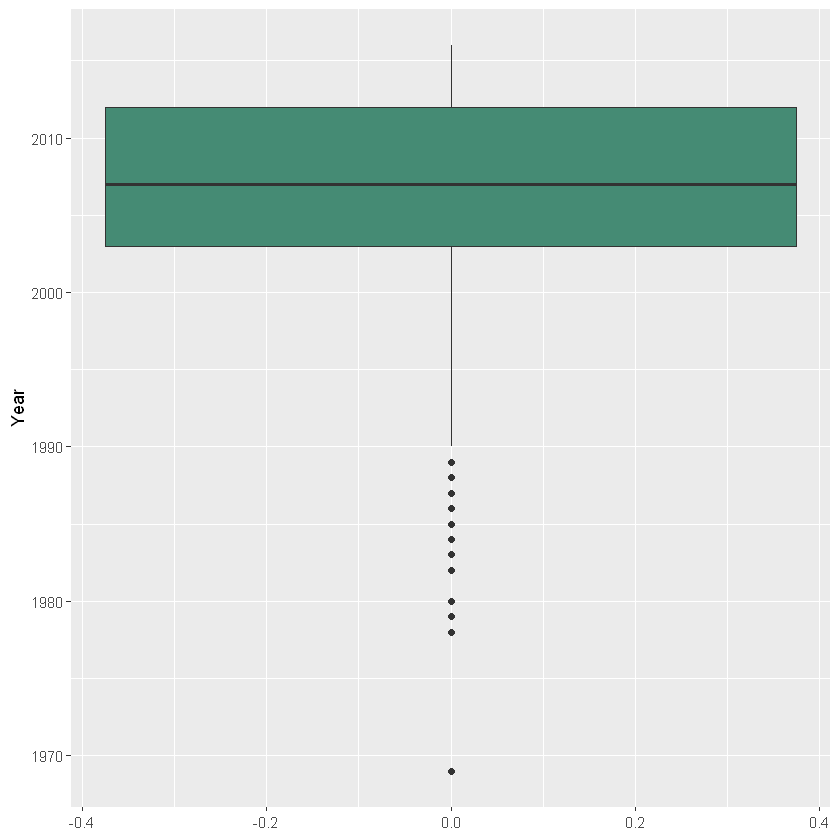

In [44]:
## CHECKING FOR OUTLIERS WITH BOXPLOT
ggplot(data=data,aes(y=Year))+ geom_boxplot(fill='aquamarine4')

In [45]:
## FINDING INTER QUARTILE RANGE TO CALCULATE MAXIMUM VALUE OF DISTRIBUTION USING "IQR" FUNCTION
iqr_year= IQR(data$Year)

In [46]:
## MIN VALUE OF Year IS CALCULATED USING FORMULA "Q3 - (1.5*IQR)"
min_year = quantile(data$Year,probs=0.25)- (1.5*iqr_year)

In [47]:
min_year

25% 
1989.5

In [48]:
## ROUNDING THE YEAR
min_year = min_year+0.5

In [49]:
min_year

25% 
1990

In [50]:
## FILTERING DATA WHERE YEAR ABOVE THE MAXIMUM YEAR
filter(data,Year<min_year)

Price,Brand,Body,Mileage,EngineV,Engine.Type,Registration,Year
2900,Audi,sedan,1,2.3,Gas,yes,1989
2500,Mitsubishi,sedan,220,2.4,Petrol,yes,1987
4099,BMW,sedan,50,2.5,Petrol,yes,1988
600,Audi,sedan,112,1.6,Petrol,yes,1980
1800,Volkswagen,other,300,1.3,Petrol,yes,1989
600,Toyota,sedan,10,1.5,Petrol,yes,1979
3500,Audi,sedan,265,2.0,Diesel,yes,1986
3500,Audi,sedan,1,2.0,Other,yes,1988
2650,Mercedes-Benz,sedan,400,2.0,Gas,yes,1985
2700,Mercedes-Benz,sedan,121,2.5,Diesel,yes,1986


In [51]:
min_quantile_range = seq(0.01,0.25,by=0.01)

In [52]:
min_quantile_range

[1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15
[16] 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25

In [53]:
## USING QUANTILE FUNCTION CALLING QUANTILES FROM 1TH TO 25TH 
quantile(data$Year,probs=min_quantile_range)

1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15%  16% 
1987 1989 1991 1992 1994 1995 1996 1996 1997 1997 1998 1998 1999 1999 2000 2000 
 17%  18%  19%  20%  21%  22%  23%  24%  25% 
2000 2000 2001 2001 2001 2002 2002 2002 2003

In [54]:
## USING FOR LOOPS CHANGING VALUES
for (i in 1:4025)
{
    if (data$Year[i]<min_year)
    {
        data$Year[i]=quantile(data$Year,probs=0.03)
    }
}

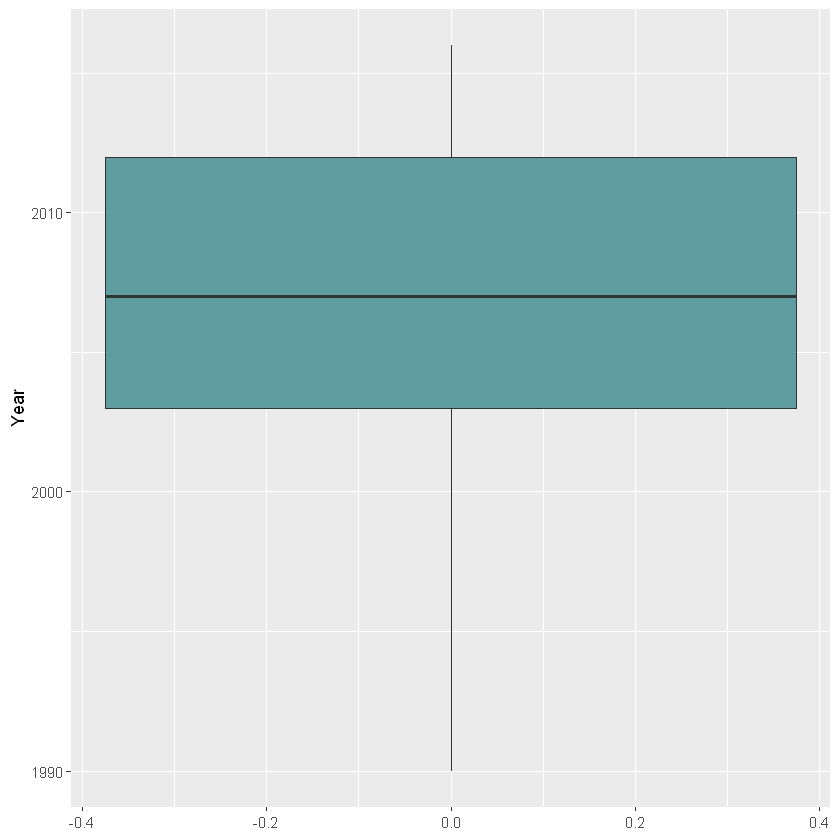

In [55]:
## CHECKING FOR OUTLIERS WITH BOXPLOT
ggplot(data=data,aes(y=Year))+ geom_boxplot(fill='cadetblue')

# 4. DATA ANALYSIS